In [21]:
import time
start_time=time.time()

In [22]:
import time
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
import pandas as pd
import seaborn as sns
import math
import sys
import os
from scipy import interpolate

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

In [23]:
dist = 410 #parsecs
pc = dist*(2*np.pi) / (360  * 60)
s0=(0.9*pc)
pc,s0

(0.11926416555294585, 0.10733774899765126)

In [26]:
orion=pd.read_table('Obs/EON-O-2.csv', delimiter=',')
orion.describe()

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,-0.231818,0.281818,-0.200000,-0.736364,-0.327273,-0.804545,-0.977273,-1.254545,-1.640909,-1.277273,...,-1.004545,-0.100000,-0.527273,-0.713636,-1.427273,-0.372727,-0.654545,0.331818,0.677273,0.109091
std,1.087324,0.851126,1.024927,1.679157,1.322401,1.365729,1.619798,2.538040,2.005150,2.880134,...,2.450943,2.850731,2.375105,3.112386,2.390493,2.460000,2.504040,2.193147,3.083278,0.762146
min,-5.100000,-0.100000,-3.300000,-5.600000,-4.100000,-4.000000,-4.100000,-5.700000,-6.300000,-5.800000,...,-5.300000,-3.800000,-5.400000,-6.000000,-6.100000,-5.000000,-6.100000,-3.100000,-8.100000,-1.100000
25%,0.000000,0.000000,0.000000,-0.700000,-0.525000,-1.250000,-2.100000,-3.025000,-3.000000,-3.125000,...,-2.650000,-2.000000,-2.275000,-2.525000,-3.425000,-1.875000,-0.075000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.050000,-0.150000,-0.900000,-1.900000,...,-0.400000,-0.650000,-0.400000,0.000000,-0.300000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.050000,0.225000,...,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.000000,2.900000,2.000000,0.600000,2.500000,0.900000,2.300000,3.400000,1.400000,7.900000,...,2.900000,8.900000,4.700000,9.900000,2.600000,4.800000,6.400000,7.100000,7.300000,2.900000


orion[orion == 0] = 'nan' 
orion

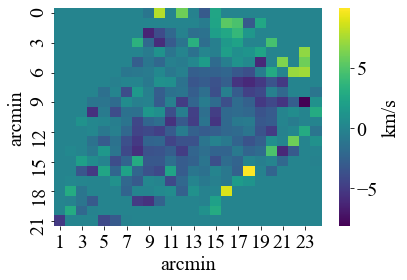

In [27]:
fig, ax = plt.subplots()
sns.heatmap(orion,cmap="viridis",cbar_kws={'label': 'km/s'})
#plt.scatter(13.5, 13.5, marker='+', color='yellow', s=150)
ax.set(xlabel='arcmin', ylabel='arcmin')

#ax.text(0.93, 0.81, '1.3 pc',
#        verticalalignment='bottom', horizontalalignment='right',
#        transform=ax.transAxes,
#        color='black', fontsize=20)
    
#plt.axhline(y=2, xmin=0.68, xmax=0.96, linewidth=2, color = 'k')

#plt.text(14.5, 14.5, '$θ^{1}Ori\ C$', fontsize=20, color='yellow')

plt.show()

In [28]:
df=orion.stack().reset_index().rename(columns={'level_0':'RAdeg', 'level_1':'DEdeg', 0:'RVHalpha'})
df.describe()

,RAdeg,RVHalpha
count,528.000000,528.000000
mean,10.500000,-0.664962
std,6.350305,2.161287
min,0.000000,-8.100000
25%,5.000000,-1.900000
50%,10.500000,0.000000
75%,16.000000,0.000000
max,21.000000,9.900000


In [29]:
df.RAdeg=1.0*df.RAdeg

In [30]:
df.DEdeg=pd.to_numeric(df.DEdeg)*1.0

Structure Function

In [31]:
df0 = pd.DataFrame({'X': df.RAdeg, 'Y': df.DEdeg, 'RV': df.RVHalpha})
df0.describe()

,X,Y,RV
count,528.000000,528.000000,528.000000
mean,10.500000,12.500000,-0.664962
std,6.350305,6.928751,2.161287
min,0.000000,1.000000,-8.100000
25%,5.000000,6.750000,-1.900000
50%,10.500000,12.500000,0.000000
75%,16.000000,18.250000,0.000000
max,21.000000,24.000000,9.900000


In [32]:
df0["RV"] = df0["RV"].replace(['0', 0], np.nan)


In [33]:
df0.describe()

,X,Y,RV
count,528.000000,528.000000,297.000000
mean,10.500000,12.500000,-1.182155
std,6.350305,6.928751,2.775445
min,0.000000,1.000000,-8.100000
25%,5.000000,6.750000,-3.000000
50%,10.500000,12.500000,-1.400000
75%,16.000000,18.250000,0.100000
max,21.000000,24.000000,9.900000


In [34]:
data=df0

Text(0.5, 17.60000000000001, 'Radial velocity [km/s]')

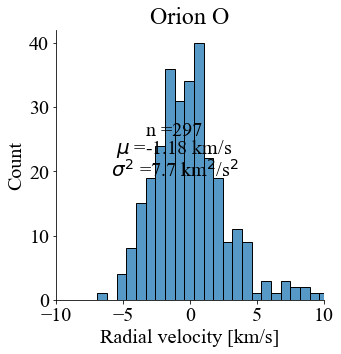

In [35]:
#fig, ax = plt.subplots()

sns.displot(data.RV-data.RV.mean(),bins=25)
plt.xlim(-10,10)

plt.text(0.45, 0.86,'n ='+str(data.RV.count()), ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.45, 0.78,'$μ$ ='+str(np.round(data.RV.mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.45, 0.68,'$σ^{2}$ ='+str(np.round(data.RV.var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('Orion O')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

plt.xlabel('Radial velocity [km/s]')


In [36]:
data.X = data.X*pc
data.Y = data.Y*pc

In [37]:
OrionLO = {'OrionLO' : data,
           'pc' : pc,
          's0' : s0
      }
OrionLO

{'OrionLO':             X         Y  RV
 0    0.000000  0.119264 NaN
 1    0.000000  0.238528 NaN
 2    0.000000  0.357792 NaN
 3    0.000000  0.477057 NaN
 4    0.000000  0.596321 NaN
 ..        ...       ...  ..
 523  2.504547  2.385283 NaN
 524  2.504547  2.504547 NaN
 525  2.504547  2.623812 NaN
 526  2.504547  2.743076 NaN
 527  2.504547  2.862340 NaN
 
 [528 rows x 3 columns],
 'pc': 0.11926416555294585,
 's0': 0.10733774899765126}

In [38]:
OrionM = {'vv' : np.array(orion),
        'pc' : pc,
        's0' : s0,
      }

In [39]:
import pickle

f = open('VF\\OrionLO.pkl',"wb")
pickle.dump(data,f)
f.close()

In [40]:
f = open('VFL\\OrionLO.pkl',"wb")
pickle.dump(OrionLO,f)
f.close()

In [41]:
f = open('VFM\\OrionLO.pkl',"wb")
pickle.dump(OrionM,f)
f.close()

In [42]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 73.77790141105652 seconds ---
